In [76]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# force to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [77]:
# variables to find race and driver, also cut off time to take out yellow flags and pit stop laps
race_id = 5550
driver_index = 0
lap_time_cutoff = 17

In [78]:
# Find race name and location

url = 'https://cf.nascar.com/cacher/2025/race_list_basic.json'
json = requests.get(url).json()
race = pd.json_normalize(json['series_1'])
race = race[['race_id', 'track_name', 'race_name']].set_index('race_id')
race = race.loc[race_id]
location = race.values[0]
name = race.values[1]
race = name + ' @ ' + location

print(race)

Food City 500 @ Bristol Motor Speedway


In [79]:
# Find driver info by index number (ex: Suarez is 17)
url = f'https://cf.nascar.com/cacher/2025/1/{race_id}/lap-times.json'
json = requests.get(url).json()
driver = pd.json_normalize(json['laps'])

print(driver[['Number','FullName','Manufacturer','NASCARDriverID']])

   Number               FullName Manufacturer  NASCARDriverID
0       5            Kyle Larson          Chv            4030
1      11           Denny Hamlin          Tyt            1361
2      54               Ty Gibbs          Tyt            4368
3      19          Chase Briscoe          Tyt            4228
4      12            Ryan Blaney          Frd            4023
5      24          William Byron          Chv            4184
6       1          Ross Chastain          Chv            4001
7      20       Christopher Bell          Tyt            4153
8      16        AJ Allmendinger          Chv            3774
9       3          Austin Dillon          Chv            3873
10     77         Carson Hocevar          Chv            4326
11     21             Josh Berry          Frd            4123
12      7           Justin Haley          Chv            4172
13      8             Kyle Busch          Chv             454
14      9          Chase Elliott          Chv            4062
15      

In [80]:
# Find driver name by index
# race is Bristol Food City 500


url = f'https://cf.nascar.com/cacher/2025/1/{race_id}/lap-times.json'
json = requests.get(url).json()
driver = pd.json_normalize(json['laps'][driver_index])
driver = driver['FullName'].iloc[0]


print(driver)
print(race)

Kyle Larson
Food City 500 @ Bristol Motor Speedway


In [81]:
# driver laps
# take out yellow flag laps by lap_time_cutoff
# post fixed averages

race_laps = df[df['LapTime'] < lap_time_cutoff]

print('\n', driver, '\n')
print('Min Lap: ', race_laps['LapTime'].min())
print('Ave Lap: ', race_laps['LapTime'].astype(float).mean())
print('Max Lap: ', race_laps['LapTime'].max(), '\n')
print('Averages:\n', race_laps[['LapTime','LapSpeed','RunningPos']].astype(float).mean())


 Kyle Larson 

Min Lap:  15.494
Ave Lap:  15.980596916299557
Max Lap:  16.715 

Averages:
 LapTime        15.980597
LapSpeed      120.084910
RunningPos     15.845815
dtype: float64


In [82]:
# present cleaned data

print(race_laps.head(10))

    Lap  LapTime LapSpeed  RunningPos
2     2   16.169  118.672          36
3     3   16.119  119.040          36
4     4   15.990  120.000          34
5     5   15.804  121.412          34
6     6   16.041  119.618          33
7     7   16.206  118.401          33
8     8   16.240  118.153          33
9     9   16.086  119.284          31
10   10   16.206  118.401          31
11   11   16.245  118.116          31


## plotly chart: tire degredation with cleaned lap data

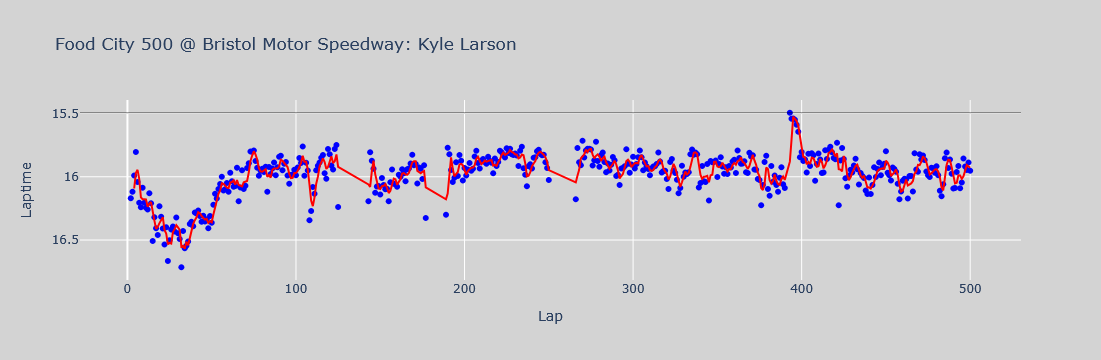

In [83]:
laptime = race_laps['LapTime']
lap = race_laps['Lap']
title = race + ': ' + driver



fig = px.scatter(x=lap, y=laptime, title=title, labels={'x':'Lap','y':'Laptime'}, trendline='rolling', trendline_options=dict(window=3), trendline_color_override='red')
fig.update_layout(paper_bgcolor='lightgray', plot_bgcolor='lightgray', yaxis=dict(autorange='reversed'))
fig.update_traces(marker=dict(color='blue'))
fig.add_hline(y=laptime.min(), line_width=0.5, line_color="black")
#print(fig)
fig.show()

In [100]:
start_pos = df['RunningPos'].sort_values().head(1).to_numpy()
start_pos = start_pos[0]
end_pos = df['RunningPos'].sort_values().tail(1).to_numpy()
end_pos = end_pos[0]

print(driver + ', ' + race)
print('Min Lap: ', race_laps['LapTime'].min())
print('Max Lap: ', race_laps['LapTime'].max(), '\n')
print(f'Started: P-{start_pos} \nEnded: P-{end_pos}')

TypeError: Series.sort_values() takes 1 positional argument but 2 were given

In [101]:
print(race)

Food City 500 @ Bristol Motor Speedway
